In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

## (a) Download Data Set

In [2]:
raw_data = loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df= pd.DataFrame(raw_data[0])
a = df['class'].astype(str).map({"b'Abnormal'": 1, "b'Normal'": 0})
df['class'] = df['class'].astype(str).map({"b'Abnormal'": 'Abnormal', "b'Normal'": 'Normal'})
df['binary'] = a
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,binary
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0


In [11]:
df.columns[0:6]

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

## (b) PreProcessing and Exploratory Data Analysis

#### i. Make scatterplots of independent variables

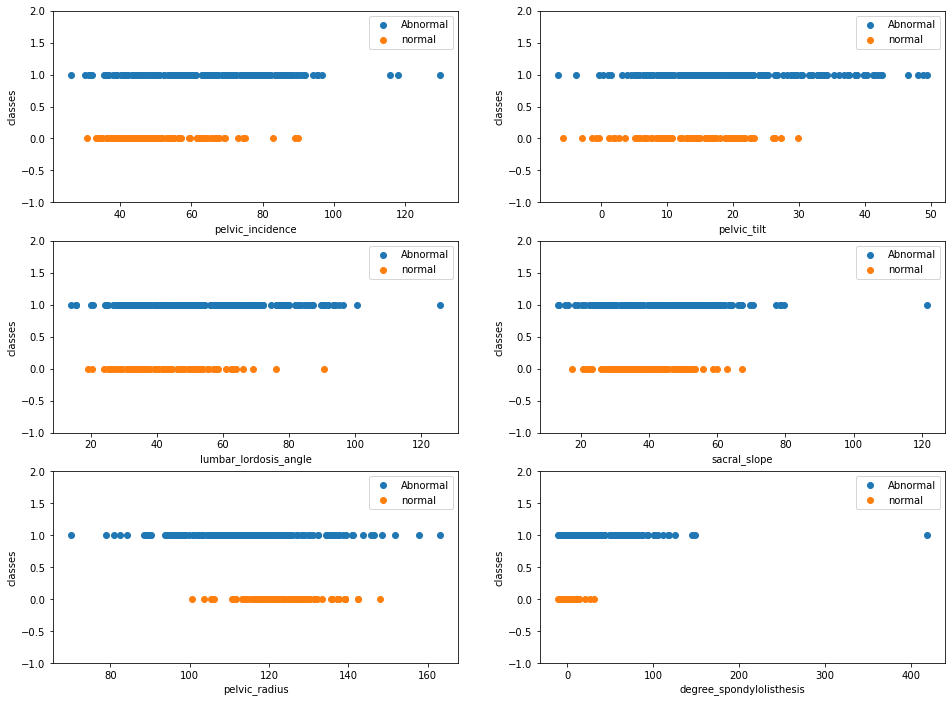

In [4]:
# scatterplots of independent variables
abnormal = df[df['binary'] == 1]
normal = df[df['binary'] == 0]
plt.figure(figsize = (16, 12))
for i in np.arange(0,6):
    ab_item = abnormal[df.columns[i]]
    nor_item = normal[df.columns[i]]
    plt.subplot(3,2,i+1)
    plt.ylim(-1,2)
    plt.scatter(ab_item, abnormal['binary'], label = "Abnormal")
    plt.scatter(nor_item, normal['binary'], label = 'normal')
    plt.legend()
    plt.xlabel(df.columns[i])
    plt.ylabel("classes")

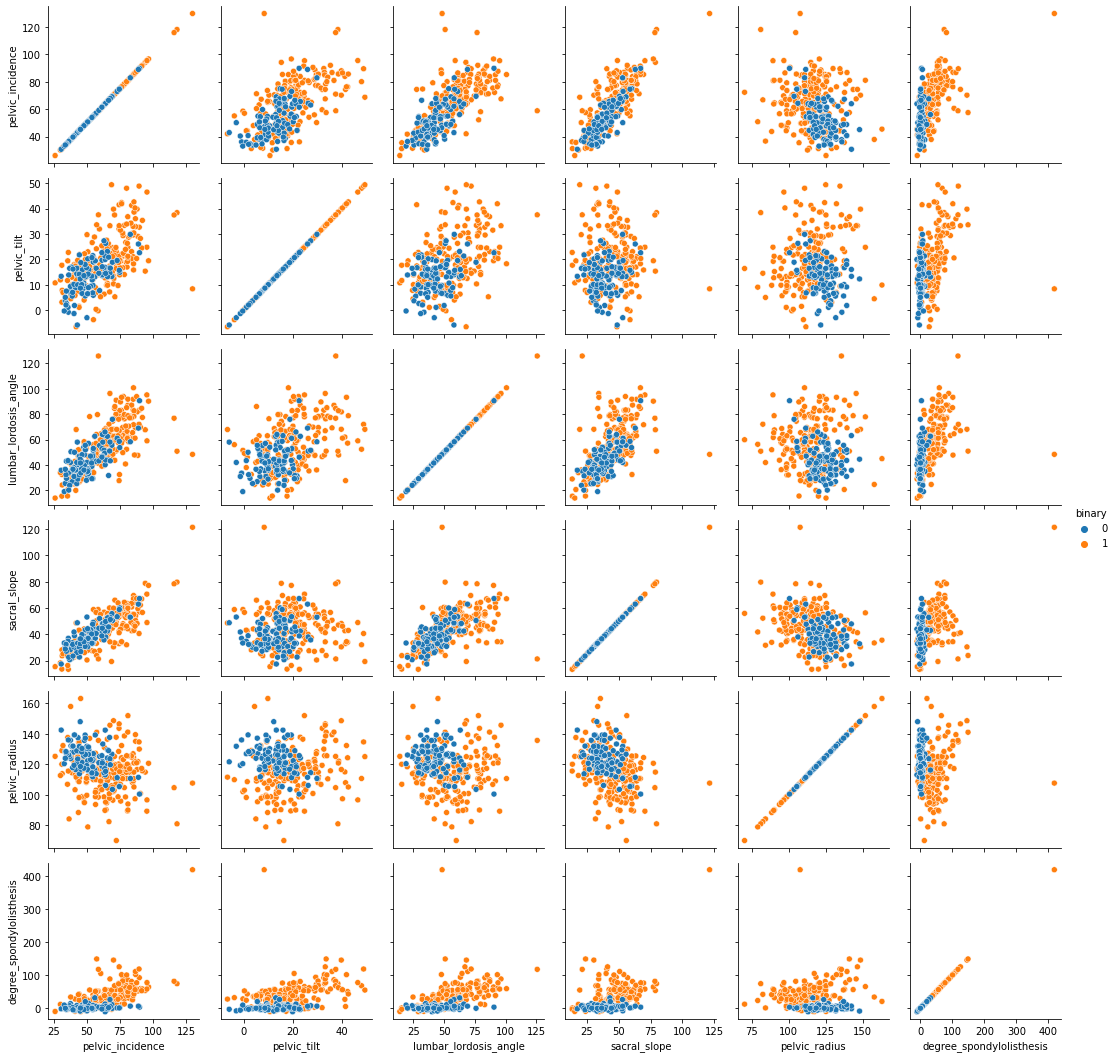

In [5]:
#bi.using seaborn to create a grid for all variables
g = sns.PairGrid(df, vars = df.columns[0:6], hue = "binary")
g.map(sns.scatterplot);
g.add_legend();

Conclusion: The multiple scatter plots display some strong correlation between some variables. For example, pelvic_incidence and lumbar_lordosis_angle, pelvic_incidence and sacral_slope have positive correlation and two classes of points overlap a lot. They also form  linear relationships. On the other side, peivic_radius and pelvic_tilt has no correlation.

#### ii Boxplots for each of the independent variables

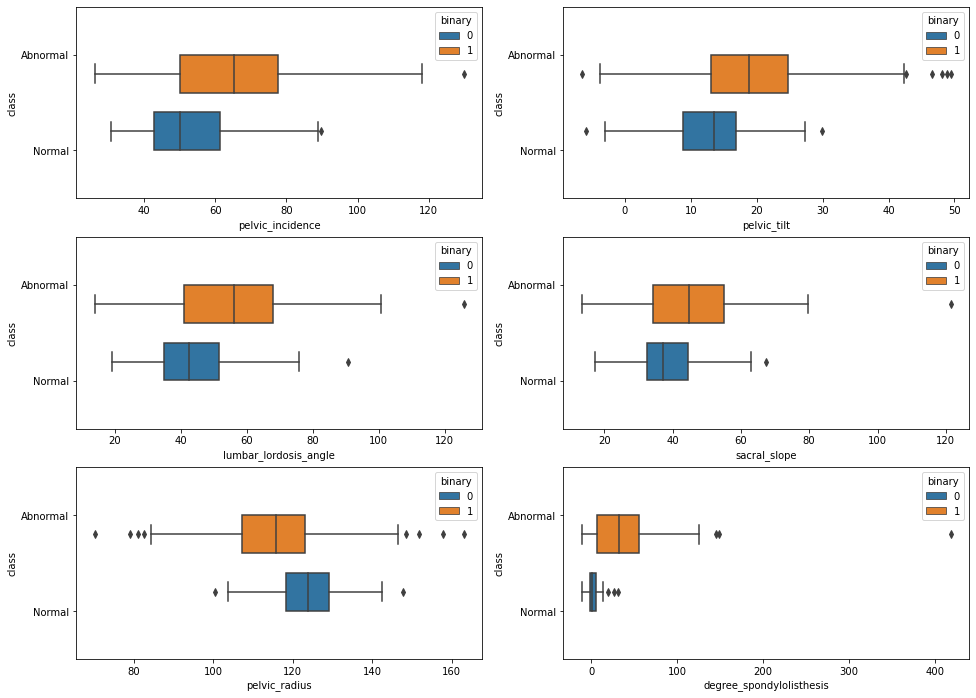

In [6]:
plt.figure(figsize = (16, 12))
for i in np.arange(0,6):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, x=df.columns[i], y="class", hue="binary")

plt.show()

Conclusion: In the boxplots above, if the spread of data(range) is large between abnormal and normal class, the vairable is significant. We can see that in degree_spondylolisthesis, the range of abnormal is larger than normal which means this biomechanical attributes is a significant factor for patients. We can also see the display of outliers in graphs.

#### iii Select Training Set and Test Set

In [7]:
Training_0 = df[df['binary'] == 0].iloc[0:70, :]
Training_1 = df[df['binary'] == 1].iloc[0:140, :]
Test_0 = df[df['binary'] == 0].iloc[70:, :]
Test_1 = df[df['binary'] == 1].iloc[140:, :]
Trn = pd.concat([Training_0, Training_1], axis=0).reset_index(drop = True)
Test = pd.concat([Test_0, Test_1], axis=0).reset_index(drop = True)
print('traing data shape:', Trn.shape)
print('test data shape:', Test.shape)

traing data shape: (210, 8)
test data shape: (100, 8)


#### Split datasets to X_train, y_train, X_test, y_test for training models

In [8]:
X_train = Trn.drop(['class', 'binary'], axis = 1)
y_train = Trn['binary']
X_test = Test.drop(['class', 'binary'], axis = 1)
y_test = Test['binary']
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (210, 6)
y_train shape: (210,)
X_test shape: (100, 6)
y_test shape: (100,)


## (C) Classification using KNN 

#### i. K-nearst neighbors with Euclidean metric

In [9]:
# using sklearn package for KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

print("Accuracy with k=5", accuracy_score(y_test, y_pred))
# print("Accuracy with k=5", KNN_model.score(X_test, y_test))

Accuracy with k=5 0.9


#### ii. Test all the data with KNN, take decision by majority polling and plot train and test errors in terms of k. Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-1 score.

The best K is:  4 with test error rate is:  0.06000000000000005


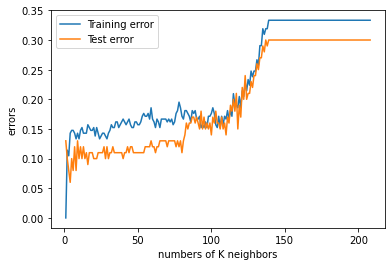

In [10]:
k_range = np.arange(1,209)
test_errors=[]
train_errors=[]
best, best_k = [], 0

for i in k_range[::-1]:
    model = KNeighborsClassifier(n_neighbors = i, p = 2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    if len(best) == 0:
        best.append(testAcc)
    elif best[0] < testAcc:
        best[0] = testAcc
        best_k = i
    train_errors.append(1 - trainAcc)
    test_errors.append(1 - testAcc)
#     print(i)
#     print(1-testAcc)

plt.plot(k_range[::-1], train_errors, label = "Training error")
plt.plot(k_range[::-1], test_errors, label = "Test error")
plt.xlabel("numbers of K neighbors")
plt.ylabel("errors")
plt.legend()

print("The best K is: ", best_k, "with test error rate is: ", 1- best[0])

In [11]:
# choose best_k = 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_ii = KNeighborsClassifier(n_neighbors = best_k,  p = 2)
model_ii.fit(X_train, y_train)
y_pred = model_ii.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

#CALCULATE PRECISION, TPR, FPR AND F1-SCORE MANUALLY
TPR = TP/(TP+FN) 
TNR = TN/(TN+FP)
precision = TP/(TP + FP)
recall = TP/(TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)
print("Confusion Matrix is: \n", cm)

print("True Positive Rate is: ", TPR)
print("True Negative Rate is: ", TNR)
print("precision(manually) is: ", precision)
print("F1-score(manually) is: ", f1_score)

Confusion Matrix is: 
 [[25  5]
 [ 1 69]]
True Positive Rate is:  0.9857142857142858
True Negative Rate is:  0.8333333333333334
precision(manually) is:  0.9324324324324325
F1-score(manually) is:  0.9583333333333333


In [12]:
#CALCULATE BY USING PACKAGE
from sklearn.metrics import f1_score
print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))
print('f1:',f1_score(y_test, y_pred))

Precision: 0.9324324324324325
f1: 0.9583333333333333


#### iii. Plot the best test error rate against the size of training set, when the size of training set is N ∈ {10,20,30, . . . ,210} 

Text(0.5, 1.0, 'Learning Curve')

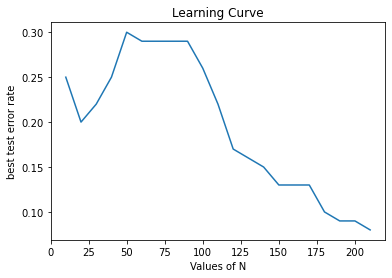

In [13]:
# function of selecting training set based on value of N
def select_dataset(train_df, N):
    df_0 = train_df[train_df['binary'] == 0].iloc[0:int(N/3), :]
    df_1 = train_df[train_df['binary'] == 1].iloc[0:int(N-N//3), :]
    Trn = pd.concat([df_0, df_1], axis=0).reset_index(drop = True)
    if len(Trn) == N:
        return Trn

def best_error_rate(train_df , N, X_test, y_test):
    K_range = np.arange(1,N,5)
    error_rates = {}
    for k in K_range[::-1]:
        model = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
        X_train = train_df.drop(['class', 'binary'], axis = 1)
        y_train = train_df['binary']
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        testErr = 1 - model.score(X_test, y_test)
        error_rates[k] = testErr
#         dictionary for error_rates of each k
        dict1 = {k: v for k, v in sorted(error_rates.items(), key=lambda item: item[1])}
    first_pair = next(iter((dict1.items())) )
        
    best_k = first_pair[0]
    best_error_rate = first_pair[1]
    return [best_k, best_error_rate]

range_N = np.arange(10, 220, 10)
bestE = []
for n in range_N:
    new_train = select_dataset(Trn,n)
    best_error = best_error_rate(new_train, n, X_test,y_test)[1]
    bestE.append(best_error)
    
plt.plot(range_N, bestE)    
plt.xlabel("Values of N")
plt.ylabel("best test error rate")
plt.title("Learning Curve")

## (d) Replace Euclidean metric

#### i. Minkowski Distance, Chebyshev distance, Mahalanobis Distance

The best K(Manhanttan)is: 26 
 with test error rate is:  0.10999999999999999


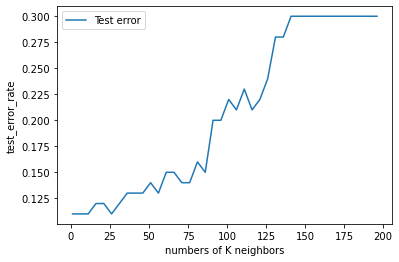

In [14]:
# di/A. Manhattan Distance
k_range = np.arange(1, 201, 5)
test_errors=[]
train_errors=[]
best, best_k = [], 0

for i in k_range[::-1]:
    model = KNeighborsClassifier(n_neighbors = i, p = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    if len(best) == 0:
        best.append(testAcc)
    elif best[0] < testAcc:
        best[0] = testAcc
        best_k = i
    train_errors.append(1 - trainAcc)
    test_errors.append(1 - testAcc)
#     print(i)
#     print(1-testAcc)
best_k_manha = best_k
test_error1 = 1- best[0]
# plt.plot(k_range[::-1], train_errors, label = "Training error")
plt.plot(k_range[::-1], test_errors, label = "Test error")
plt.xlabel("numbers of K neighbors")
plt.ylabel("test_error_rate")
plt.legend()

print("The best K(Manhanttan)is:", best_k, "\n with test error rate is: ", 1- best[0])

the best log10_p is:  0.1 , with test error rate:  0.09999999999999998
the best log10_p is:  0.2 , with test error rate:  0.09999999999999998
the best log10_p is:  0.4 , with test error rate:  0.09999999999999998
the best log10_p is:  0.6 , with test error rate:  0.09999999999999998


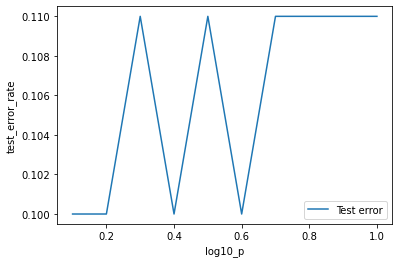

In [15]:
# di/B. log(p) with base 10
# get k = 26 from previous question
test_errors=[]
train_errors=[]
best, best_k = [], 0.1
log10_p = np.arange(0.1, 1.1, 0.1)
for i in range(len(log10_p)):
#     print(log10_p[i])
    p_val = 10 ** log10_p[i]
    model = KNeighborsClassifier(n_neighbors = 26, p=p_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    if len(best) == 0:
        best.append(testAcc)
    elif best[0] <= testAcc:
        best[0] = testAcc
        best_k = log10_p[i]
    train_errors.append(1 - trainAcc)
    test_errors.append(1 - testAcc)
#     print(i)
#     print(1-testAcc)
best_log10p = best_k
test_error2 = 1- best[0]
min_test_error = min(test_errors)
for item1, item2 in zip(log10_p, test_errors):
    if item2 == min_test_error:
        print("the best log10_p is: ", item1, ", with test error rate: ", item2)
# plt.plot(log10_p, train_errors, label = "Training error")
plt.plot(log10_p, test_errors, label = "Test error")
plt.xlabel("log10_p")
plt.ylabel("test_error_rate")
plt.legend()

The best K(chebyshev)is: 16 
 with test error rate is:  0.07999999999999996


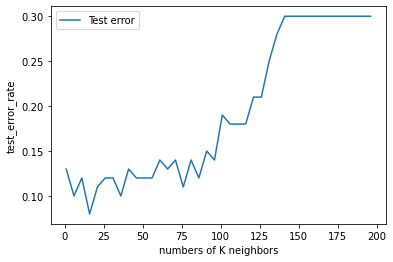

In [16]:
# chebyshev distance
k_range = np.arange(1, 201, 5)
test_errors=[]
train_errors=[]
best, best_k = [], 0

for i in k_range[::-1]:
    model = KNeighborsClassifier(n_neighbors = i, p = float('inf'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    if len(best) == 0:
        best.append(testAcc)
    elif best[0] < testAcc:
        best[0] = testAcc
        best_k = i
    train_errors.append(1 - trainAcc)
    test_errors.append(1 - testAcc)
#     print(i)
#     print(1-testAcc)
best_k_cheby = best_k
test_error3 = 1- best[0]
# plt.plot(k_range[::-1], train_errors, label = "Training error")
plt.plot(k_range[::-1], test_errors, label = "Test error")
plt.xlabel("numbers of K neighbors")
plt.ylabel("test_error_rate")
plt.legend()

print("The best K(chebyshev)is:", best_k, "\n with test error rate is: ", 1- best[0])

The best K(mahalanobis)is: 12  with test error rate is:  0.16000000000000003
Initially k = 1 has the lowest test error which is 0.15, but it is ovrfitting so I change the minimum of k to 2


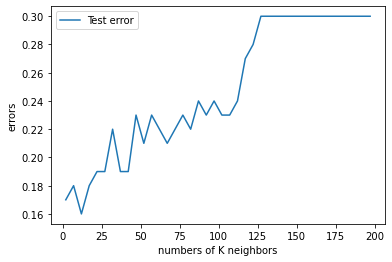

In [17]:
# mahalanobis distance
k_range = np.arange(2, 201, 5)
test_errors=[]
train_errors=[]
best, best_k = [], 2

for i in k_range:
    model = KNeighborsClassifier(n_neighbors = i, algorithm='auto', metric='mahalanobis', 
                               metric_params={'VI': np.linalg.pinv(np.cov(X_train.T))})
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
#     print(testAcc)
    if len(best) == 0:
        best.append(testAcc)
        best_k = i
    elif best[0] <= testAcc:
        
        best[0] = testAcc
        best_k = i
    train_errors.append(1 - trainAcc)
    test_errors.append(1 - testAcc)
#     print(i)
#     print(1-testAcc)
best_k_mahalan = best_k
test_error4 = 1- best[0]
# plt.plot(k_range[::-1], train_errors, label = "Training error")
plt.plot(k_range, test_errors, label = "Test error")
plt.xlabel("numbers of K neighbors")
plt.ylabel("errors")
plt.legend()

print("The best K(mahalanobis)is:", best_k, " with test error rate is: ", 1- best[0])
print("Initially k = 1 has the lowest test error which is 0.15, but it is ovrfitting so I change the minimum of k to 2")

In [18]:
best_ks = [best_k_manha, best_k_cheby, best_k_mahalan]
test_errors = [test_error1, test_error3, test_error4]
d = {'best_k': best_ks, 'best_test_error_rate': test_errors}
df = pd.DataFrame(data=d, index = ['Manhattan Distance', 'Chebyshev Distance', 'Mahalanobis Distance'])
df

,best_k,best_test_error_rate
Manhattan Distance,26,0.11
Chebyshev Distance,16,0.08
Mahalanobis Distance,12,0.16


## (e) Weighted decision among three distances

For the Euclidean Distance the best k is:  6 , with test error rate:  0.09999999999999998
For the Manhattan Distance the best k is:  26 , with test error rate:  0.09999999999999998
For the Chebyshev distance, the best k is:  [16, 31, 36, 41, 61] , with test error rate:  0.10999999999999999


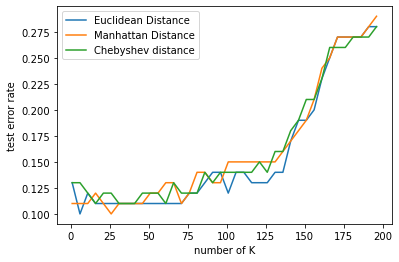

In [19]:
k_range = np.arange(1, 201, 5)
# Euclidean Distance
test_errors1=[]
def choose_best(errors, krange, str):
    min_error = np.min(errors)
#     print(min_error)
    for item1, item2 in zip(errors, krange):
#         print(item1, item2)
        if item1 == min_test_error:
            print("For the "+ str, "the best k is: ", item2, ", with test error rate: ", item1)
        
        
        
for i in k_range:
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance',metric = 'euclidean',p = 2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    test_errors1.append(1 - testAcc)
#     print([i, 1-testAcc])
best_k_euclidean = choose_best(test_errors1, k_range, "Euclidean Distance")
best_k_euclidean
# print("For the Euclidean distance, the best k is: ", best_k_euclidean, ", with test error rate: ", best_k_euclidean)


#Manhattan Distance
test_errors2=[]
for i in k_range:
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance', p = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    test_errors2.append(1 - testAcc)
#     print([i, 1-testAcc])
best_k_Manhattan = choose_best(test_errors2, k_range, "Manhattan Distance")
best_k_Manhattan
# print("For the Manhattan distance, the best k is: ", best_k_Manhattan[1], ", with test error rate: ", best_k_Manhattan[0])

# #Chebyshev Distance
test_errors3=[]
for i in k_range:
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance', p = float('inf'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trainAcc = model.score(X_train, y_train)
    testAcc = model.score(X_test, y_test)
    test_errors3.append(1 - testAcc)
#     print([i, 1-testAcc])
# print(test_errors3)
index = [i for i, e in enumerate(test_errors3) if e == np.min(test_errors3)]
k = [k_range[i] for i in index]
print("For the Chebyshev distance, the best k is: ", k, ", with test error rate: ", np.min(test_errors3))

plt.plot(k_range, test_errors1, label = "Euclidean Distance")
plt.plot(k_range, test_errors2, label = "Manhattan Distance")
plt.plot(k_range, test_errors3, label = "Chebyshev distance")
plt.xlabel('number of K')
plt.ylabel('test error rate')
plt.legend()

## (f) The lowest training error rate 

#### the lowest training error I got was 0 with K == 1.Since error will get large with the increase of K, for trainging error, k =1 is the lowest. But k=1 may cause overfitting.